# Identification d'arbres à partir de l'écorce
## Réseau convolutif et apprentissage par transfert

##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Transfer learning with pretrained Inception model - no data augmentation, no dropout



In [5]:
import os

In [6]:
# Note that we did not use Acer platanoides (2), Pinus rigida (15) and Populus grandidentata (18)
# since we did not collect enough images in these categories to obtain meaningful results.
data_ecorces = {
#           'SAB': 1,  # Pas assez d'espace disque
#           'ERB': 2,  # Pas assez de spécimens - seulement 1
            'ERR': 3, 
            'ERS': 4, 
            'BOJ': 5, 
            'BOP': 6, 
#           'HEG': 7,  # Pas assez d'espace disque
            'FRA': 8, 
#           'MEL': 9,  # Pas assez d'espace disque
#           'OSV': 10, # Pas assez d'espace disque
            'EPO': 11, 
            'EPB': 12, 
            'EPN': 13, 
            'EPR': 14, 
#           'PID': 15, # Pas assez de spécimens - seulement 4
#           'PIR': 16, # Pas assez d'espace disque
#           'PIB': 17, # Pas assez d'espace disque
#           'PEG': 18, # Pas assez de spécimens - seulement 3
#           'PET': 19, # Pas assez d'espace disque
            'CHR': 20, 
#           'THO': 21, # Pas assez d'espace disque 
#           'PRU': 22, # Pas assez d'espace disque
#           'ORA': 23  # Pas assez d'espace disque
        }

noms_arbres = {
            1: '\emph{Abies balsamea} - Sapin Baumier - Balsam fir',
            2: '\emph{Acer platanoides} - Érable de Norvège - Norway maple',
            3: '\emph{Acer rubrum} - Érable rouge - Red maple',
            4: '\emph{Acer saccharum} - Érable à sucre - Sugar maple',
            5: '\emph{Betula alleghaniensis} - Bouleau jaune - Yellow birch',
            6: '\emph{Betula papyrifera} - Bouleau à papier - White birch',
            7: '\emph{Fagus grandifolia} - Hêtre à grandes feuilles - American beech',
            8: "\emph{Fraxinus americana} - Frêne d'Amérique - White ash",
            9: '\emph{Larix laricina} - Mélèze - Tamarack',
            10: '\emph{Ostrya virginiana} - Ostryer de Virginie - American hophornbeam',
            11: '\emph{Picea abies} - Épinette de Norvège - Norway spruce',
            12: '\emph{Picea glauca} - Épinette blanche - White spruce',
            13: '\emph{Picea mariana} - Épinette noire - Black spruce',
            14: '\emph{Picea rubens} - Épinette rouge - Red spruce',
            15: '\emph{Pinus rigida} - Pin rigide - Pitch pine',
            16: '\emph{Pinus resinosa} - Pin rouge - Red pine',
            17: '\emph{Pinus strobus} - Pin blanc - Eastern white pine',
            18: '\emph{Populus grandidentata} - Peuplier à grandes dents - Big-tooth aspen',
            19: '\emph{Populus tremuloides} - Peuplier faux tremble - Quaking aspen',
            20: '\emph{Quercus rubra} - Chêne rouge - Northern red oak',
            21: '\emph{Thuja occidentalis} - Thuya occidental - Northern white cedar',
            22: '\emph{Tsuga canadensis} - Pruche du Canada - Eastern Hemlock',
            23: "\emph{Ulmus americana} - Orme d'Amérique - American elm"
        }
print("Code executed")

Code executed


In [9]:
# Création des répertoires de données
# Nous allons créer un répertoire de base `lab_id_arbres` et des répertoires
# pour les données d'entrainement et de test pour chaque étiquette cible

try:
    os.mkdir("/tmp/src/")
except OSError:
    pass
try:
    os.mkdir("/tmp/lab_id_arbres/")
except OSError:
    pass
try:
    os.mkdir("/tmp/lab_id_arbres/training/")
except OSError:
    pass
try:
    os.mkdir("/tmp/lab_id_arbres/testing/")
except OSError:
    pass


for arbre_id in data_ecorces.keys():
    print(arbre_id,noms_arbres[data_ecorces[arbre_id]].split('-')[1])
    try:
        os.mkdir("/tmp/lab_id_arbres/training/"+arbre_id)
        os.mkdir("/tmp/lab_id_arbres/testing/"+arbre_id)
    except OSError:
        continue


ERR  Érable rouge 
ERS  Érable à sucre 
BOJ  Bouleau jaune 
BOP  Bouleau à papier 
FRA  Frêne d'Amérique 
EPO  Épinette de Norvège 
EPB  Épinette blanche 
EPN  Épinette noire 
EPR  Épinette rouge 
CHR  Chêne rouge 


In [10]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import shutil
import zipfile


In [11]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [15]:
file = drive.CreateFile({'id':'1cdQGceauapYY8UoSeAgVkVAOUKlnlnRR'})
file.GetContentFile('/tmp/src/BOJ.zip') # Download file as 'BOJ.zip'.
print('File BOJ.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/BOJ.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File BOJ.zip unzipped')
try:
  os.remove('/tmp/src/BOJ.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File BOJ.zip deleted')
except:
  print("?")



File BOJ.zip uploaded
File BOJ.zip unzipped
File BOJ.zip deleted


In [13]:
file = drive.CreateFile({'id':'1Ce8pvj-7aClnSpbEd7dNl1qm40y2Jze4'})
file.GetContentFile('/tmp/src/BOP.zip') # Download file as 'BOP.zip'.
print('File BOP.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/BOP.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File BOP.zip unzipped')
try:
  os.remove('/tmp/src/BOP.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File BOP.zip deleted')
except:
  print("?")

File BOP.zip uploaded
File BOP.zip unzipped
File BOP.zip deleted


In [16]:
file = drive.CreateFile({'id':'1S9H4G5PuehMeanY3MmuAAt5ij4tk44PW'})
file.GetContentFile('/tmp/src/CHR.zip') # Download file as 'CHR.zip'.
print('File CHR.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/CHR.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File CHR.zip unzipped')
try:
  os.remove('/tmp/src/CHR.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File CHR.zip deleted')
except:
  print("?")

File CHR.zip uploaded
File CHR.zip unzipped
File CHR.zip deleted


In [17]:
file = drive.CreateFile({'id':'1UVgIyPxBh2a6ZJV18LIP8gNVqc2qUxCG'})
file.GetContentFile('/tmp/src/EPB.zip') # Download file as 'EPB.zip'.
print('File EPB.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/EPB.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File EPB.zip unzipped')
try:
  os.remove('/tmp/src/EPB.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File EPB.zip deleted')
except:
  print("?")

File EPB.zip uploaded
File EPB.zip unzipped
File EPB.zip deleted


In [18]:
file = drive.CreateFile({'id':'1PC2KXa0nXCbimMCznm_uIHgaCeiupG69'})
file.GetContentFile('/tmp/src/EPN.zip') # Download file as 'EPN.zip'.
print('File EPN.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/EPN.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File EPN.zip unzipped')
try:
  os.remove('/tmp/src/EPN.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File EPN.zip deleted')
except:
  print("?")


File EPN.zip uploaded
File EPN.zip unzipped
File EPN.zip deleted


In [19]:
file = drive.CreateFile({'id':'1WF2h4VkBQ6P6s7TmQB32KN7nx6LQQTFT'})
file.GetContentFile('/tmp/src/EPO.zip') # Download file as 'EPO.zip'.
print('File EPO.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/EPO.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File EPO.zip unzipped')
try:
  os.remove('/tmp/src/EPO.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File EPO.zip deleted')
except:
  print("?")

File EPO.zip uploaded
File EPO.zip unzipped
File EPO.zip deleted


In [20]:
file = drive.CreateFile({'id': '1DDS1XcG02j5nF022zSm_EHBHC8oQdjyT'})
file.GetContentFile('/tmp/src/EPR.zip') # Download file as 'EPR.zip'.
print('File EPR.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/EPR.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File EPR.zip unzipped')
try:
  os.remove('/tmp/src/EPR.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File EPR.zip deleted')
except:
  print("?")

File EPR.zip uploaded
File EPR.zip unzipped
File EPR.zip deleted


In [21]:
file = drive.CreateFile({'id': '16jC6GJGTVqR-V6_QPTm0h9_2s4ArzRM4'})
file.GetContentFile('/tmp/src/ERR.zip') # Download file as 'ERR.zip'.
print('File ERR.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/ERR.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File ERR.zip unzipped')
try:
  os.remove('/tmp/src/ERR.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File ERR.zip deleted')
except:
  print("?")

File ERR.zip uploaded
File ERR.zip unzipped
File ERR.zip deleted


In [22]:
# Pas assez de spécimens 
# file = drive.CreateFile({'id': '16Y4xx20TjV2UVYbnR1eLa-myRyct2MNJ'})
# file.GetContentFile('/tmp/src/ERB.zip') # Download file as 'ERB.zip'.
# print('File ERB.zip uploaded')
# zip_ref = zipfile.ZipFile('/tmp/src/ERB.zip', 'r')
# zip_ref.extractall('/tmp/src')
# zip_ref.close()
# print('File ERB.zip unzipped')
# try:
#   os.remove('/tmp/src/ERB.zip')
#   shutil.rmtree('/tmp/src/__MACOSX')
#   print('File ERB.zip deleted')
# except:
#   print("?")


In [23]:
file = drive.CreateFile({'id': '1tkioLqev4Gvo_ngGnjpcRqbTaOrLz46M'})
file.GetContentFile('/tmp/src/ERS.zip') # Download file as 'ERS.zip'.
print('File ERS.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/ERS.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File ERS.zip unzipped')
try:
  os.remove('/tmp/src/ERS.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File ERS.zip deleted')
except:
  print("?")


File ERS.zip uploaded
File ERS.zip unzipped
File ERS.zip deleted


In [24]:
file = drive.CreateFile({'id': '1kd9S8OCg72mYgntWyRMQI6nsUZdxD59o'})
file.GetContentFile('/tmp/src/FRA.zip') # Download file as 'FRA.zip'.
print('File FRA.zip uploaded')
zip_ref = zipfile.ZipFile('/tmp/src/FRA.zip', 'r')
zip_ref.extractall('/tmp/src')
zip_ref.close()
print('File FRA.zip unzipped')
try:
  os.remove('/tmp/src/FRA.zip')
  shutil.rmtree('/tmp/src/__MACOSX')
  print('File FRA.zip deleted')
except:
  print("?")


File FRA.zip uploaded
File FRA.zip unzipped
File FRA.zip deleted




## Manque d'espace disque - données non utilisées


In [25]:
# file = drive.CreateFile({'id': '1vcDhYyys1m-TcB1GVUSAa8FivOtCtAIl'})
# file.GetContentFile('/tmp/src/HEG.zip') # Download file as 'HEG.zip'.
# print('File HEG.zip uploaded')
# zip_ref = zipfile.ZipFile('/tmp/src/HEG.zip', 'r')
# zip_ref.extractall('/tmp/src')
# zip_ref.close()
# print('File HEG.zip unzipped')
# try:
#   os.remove('/tmp/src/HEG.zip')
#   shutil.rmtree('/tmp/src/__MACOSX')
#   print('File HEG.zip deleted')
# except:
#   print("?")

In [26]:
# file = drive.CreateFile({'id': '1z3kWfGvjV0Ib65-dpvyN9WtEXVqfPkpo'})
# file.GetContentFile('/tmp/src/MEL.zip') # Download file as 'MEL.zip'.
# print('File MEL.zip uploaded')
# zip_ref = zipfile.ZipFile('/tmp/src/MEL.zip', 'r')
# zip_ref.extractall('/tmp/src')
# zip_ref.close()
# print('File MEL.zip unzipped')
# try:
#   os.remove('/tmp/src/MEL.zip')
#   shutil.rmtree('/tmp/src/__MACOSX')
#   print('File MEL.zip deleted')
# except:
#   print("?")

In [27]:
# file = drive.CreateFile({'id': '1_GNJntuj2z8cER4975I_QzS0A7IkTsHE'})
# file.GetContentFile('/tmp/src/ORA.zip') # Download file as 'ORA.zip'.
# print('File ORA.zip uploaded')
# zip_ref = zipfile.ZipFile('/tmp/src/ORA.zip', 'r')
# zip_ref.extractall('/tmp/src')
# zip_ref.close()
# print('File ORA.zip unzipped')
# try:
#   os.remove('/tmp/src/ORA.zip')
#   shutil.rmtree('/tmp/src/__MACOSX')
#   print('File ORA.zip deleted')
# except:
#   print("?")


In [28]:
# file = drive.CreateFile({'id': '1hNyZWGxzf8dwhjz1kSMA8YmkBd6VY1CE'})
# file.GetContentFile('/tmp/src/OSV.zip') # Download file as 'OSV.zip'.
# print('File OSV.zip uploaded')
# zip_ref = zipfile.ZipFile('/tmp/src/OSV.zip', 'r')
# zip_ref.extractall('/tmp/src')
# zip_ref.close()
# print('File OSV.zip unzipped')
# try:
#   os.remove('/tmp/src/OSV.zip')
#   shutil.rmtree('/tmp/src/__MACOSX')
#   print('File OSV.zip deleted')
# except:
#   print("?")

In [29]:
# Pas assez de spécimens 
# file = drive.CreateFile({'id': '1yTZoJ8DVfkx4JHP3pDKEvwRF2mWsjLGM'})
# file.GetContentFile('/tmp/src/PEG.zip') # Download file as 'PEG.zip'.
# print('File PEG.zip uploaded')
# zip_ref = zipfile.ZipFile('/tmp/src/PEG.zip', 'r')
# zip_ref.extractall('/tmp/src')
# zip_ref.close()
# print('File PEG.zip unzipped')
# try:
#   os.remove('/tmp/src/PEG.zip')
#   shutil.rmtree('/tmp/src/__MACOSX')
#   print('File PEG.zip deleted')
# except:
#   print("?")

In [30]:
# file = drive.CreateFile({'id': '1bqXpGCo1Y6nILafnQH5mreBOGTeO7tKt'})
# file.GetContentFile('/tmp/src/PET.zip') # Download file as 'PET.zip'.
# print('File PET.zip uploaded')
# zip_ref = zipfile.ZipFile('/tmp/src/PET.zip', 'r')
# zip_ref.extractall('/tmp/src')
# zip_ref.close()
# print('File PET.zip unzipped')
# try:
#   os.remove('/tmp/src/PET.zip')
#   shutil.rmtree('/tmp/src/__MACOSX')
#   print('File PET.zip deleted')
# except:
#   print("?")

In [31]:
# file = drive.CreateFile({'id': '1zBtowXtjFYEzLZ6yZYMDoZyhe1qyMrsf'})
# file.GetContentFile('/tmp/src/PIB.zip') # Download file as 'PIB.zip'.
# print('File PIB.zip uploaded')
# zip_ref = zipfile.ZipFile('/tmp/src/PIB.zip', 'r')
# zip_ref.extractall('/tmp/src')
# zip_ref.close()
# print('File PIB.zip unzipped')
# try:
#   os.remove('/tmp/src/PIB.zip')
#   shutil.rmtree('/tmp/src/__MACOSX')
#   print('File PIB.zip deleted')
# except:
#   print("?")

In [32]:
# Pas assez de spécimens 
# file = drive.CreateFile({'id': '1E4s-L0JiSzWesW8tphMHuyPUhmdEMK9g'})
# file.GetContentFile('/tmp/src/PID.zip') # Download file as 'PIB.zip'.
# print('File PID.zip uploaded')
# zip_ref = zipfile.ZipFile('/tmp/src/PID.zip', 'r')
# zip_ref.extractall('/tmp/src')
# zip_ref.close()
# print('File PID.zip unzipped')
# try:
#   os.remove('/tmp/src/PID.zip')
#   shutil.rmtree('/tmp/src/__MACOSX')
#   print('File PID.zip deleted')
# except:
#   print("?")

In [33]:
# file = drive.CreateFile({'id': '1SWyDksgJ7eWn8Foefrxo6YHKoDmVO0bJ'})
# file.GetContentFile('/tmp/src/PIR.zip') # Download file as 'PIR.zip'.
# print('File PIR.zip uploaded')
# zip_ref = zipfile.ZipFile('/tmp/src/PIR.zip', 'r')
# zip_ref.extractall('/tmp/src')
# zip_ref.close()
# print('File PIR.zip unzipped')
# try:
#   os.remove('/tmp/src/PIR.zip')
#   shutil.rmtree('/tmp/src/__MACOSX')
#   print('File PIR.zip deleted')
# except:
#   print("?")

In [34]:
# file = drive.CreateFile({'id': '1oVfiEwnZx59EihEstTUojYbF2OTn9zXp'})
# file.GetContentFile('/tmp/src/PRU.zip') # Download file as 'PRU.zip'.
# print('File PRU.zip uploaded')
# zip_ref = zipfile.ZipFile('/tmp/src/PRU.zip', 'r')
# zip_ref.extractall('/tmp/src')
# zip_ref.close()
# print('File PRU.zip unzipped')
# try:
#   os.remove('/tmp/src/PRU.zip')
#   shutil.rmtree('/tmp/src/__MACOSX')
#   print('File PRU.zip deleted')
# except:
#   print("?")

In [35]:
# file = drive.CreateFile({'id': '1oVfiEwnZx59EihEstTUojYbF2OTn9zXp'})
# file.GetContentFile('/tmp/src/SAB.zip') # Download file as 'SAB.zip'.
# print('File SAB.zip uploaded')
# zip_ref = zipfile.ZipFile('/tmp/src/SAB.zip', 'r')
# zip_ref.extractall('/tmp/src')
# zip_ref.close()
# print('File SAB.zip unzipped')
# try:
#   os.remove('/tmp/src/SAB.zip')
#   shutil.rmtree('/tmp/src/__MACOSX')
#   print('File SAB.zip deleted')
# except:
#   print("?")

In [36]:
# file = drive.CreateFile({'id': '1ns9tcWzUi9MWTEmvbNjR_dm0Q70jBPbJ'})
# file.GetContentFile('/tmp/src/THO.zip') # Download file as 'THO.zip'.
# print('File THO.zip uploaded')
# zip_ref = zipfile.ZipFile('/tmp/src/THO.zip', 'r')
# zip_ref.extractall('/tmp/src')
# zip_ref.close()
# print('File THO.zip unzipped')
# try:
#   os.remove('/tmp/src/THO.zip')
#   shutil.rmtree('/tmp/src/__MACOSX')
#   print('File THO.zip deleted')
# except:
#   print("?")

In [37]:
# SOURCE_DATA_DIR = "/Users/claudecoulombe/Documents/PERSONNEL/LINGUA_CLOM-Expert/Projet_VIARENA/Lab-identification_arbres/ecorces_data/"

# for arbre_id in data_ecorces.keys():
#     try:
#         liste_fichiers = os.listdir(os.path.join(SOURCE_DATA_DIR,arbre_id))
#         print(arbre_id,noms_arbres[data_ecorces[arbre_id]].split('-')[1],"nombre d'images:", len(liste_fichiers))
#         print("échantillon de noms de fichiers:\n",liste_fichiers[:5])
#         print()
#     except:
#         continue


In [38]:
# Répartition des données d'entraînement et de tests

# Source: 

import os
import random
import shutil

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    print("SOURCE",SOURCE)
    all_source_file_names = set(os.listdir(SOURCE))
    print("all_source_file_names[:3]:",list(all_source_file_names)[:3])
    n_source_files = len(all_source_file_names)
    print("n_source_files:",n_source_files)
    n_training_files = int(n_source_files*SPLIT_SIZE)
    print("n_training_files:",n_training_files)
    random_training_file_names = set(random.sample(list(all_source_file_names), n_training_files))
    print("random_training_file_names[:3]:",list(random_training_file_names)[:3])
    testing_files_names = all_source_file_names - random_training_file_names
    print("testing_files_names[:3]:",list(testing_files_names)[:3])
    for training_file_name in random_training_file_names:
        if (os.path.isfile(SOURCE+training_file_name)) and (os.path.getsize(SOURCE+training_file_name) > 0):
            shutil.copyfile(SOURCE+training_file_name, TRAINING+training_file_name)
    for testing_file_name in testing_files_names:
        if (os.path.isfile(SOURCE+testing_file_name)) and (os.path.getsize(SOURCE+testing_file_name) > 0):
            shutil.copyfile(SOURCE+testing_file_name, TESTING+testing_file_name)
    shutil.rmtree(SOURCE)
    print("Fichier",SOURCE,'détruit')

split_size = 0.8

# SOURCE_DATA_DIR = "/Users/claudecoulombe/Documents/PERSONNEL/LINGUA_CLOM-Expert/Projet_VIARENA/Lab-identification_arbres/ecorces_data"
SOURCE_DATA_DIR = '/tmp/src/'
TRAINING_DIR = "/tmp/lab_id_arbres/training/"
TESTING_DIR = "/tmp/lab_id_arbres/testing/"

for arbre_id in data_ecorces.keys():
    try:
        split_data(os.path.join(SOURCE_DATA_DIR,arbre_id+os.sep),
                   os.path.join(TRAINING_DIR,arbre_id+os.sep),
                   os.path.join(TESTING_DIR,arbre_id+os.sep),
                   split_size)
    except:
        continue

print("Data splitting done!")

SOURCE /tmp/src/ERR/
all_source_file_names[:3]: ['568_ERR_117_GalaxyS5_20170607_141032_47.jpg', '543_ERR_25_GalaxyS7_20170922_122524_15.jpg', '561_ERR_99_GalaxyS7_20170922_131033_20.jpg']
n_source_files: 1676
n_training_files: 1340
random_training_file_names[:3]: ['758_ERR_88_GalaxyS5_20170615_105834_3.jpg', '573_ERR_39_GalaxyS5_20170607_152857_2.jpg', '551_ERR_71_GalaxyS7_20170922_124512_5.jpg']
testing_files_names[:3]: ['572_ERR_66_GalaxyS5_20170607_152657_44.jpg', '570_ERR_112_GalaxyS7_20170607_151437_15.jpg', '571_ERR_93_GalaxyS7_20170607_152022_6.jpg']
Fichier /tmp/src/ERR/ détruit
SOURCE /tmp/src/ERS/
all_source_file_names[:3]: ['785_ERS_74_GalaxyS5_20170713_114905_13.jpg', '233_ERS_111_Nexus 5_20170804_095407_5.jpg', '772_ERS_117_GalaxyS5_20170615_113648_12.jpg']
n_source_files: 1911
n_training_files: 1528
random_training_file_names[:3]: ['233_ERS_111_Nexus 5_20170804_095407_5.jpg', '772_ERS_117_GalaxyS5_20170615_113648_12.jpg', '596_ERS_214_GalaxyS7_20170607_135637_42.jpg']
tes

ERR  Érable rouge 
/tmp/lab_id_arbres/training/ERR/555_ERR_122_GalaxyS7_20170922_125322_16.jpg
/tmp/lab_id_arbres/training/ERR/763_ERR_55_GalaxyS5_20170615_112118_14.jpg
/tmp/lab_id_arbres/training/ERR/759_ERR_62_GalaxyS5_20170615_110012_46.jpg
/tmp/lab_id_arbres/training/ERR/568_ERR_117_GalaxyS5_20170607_141032_55.jpg


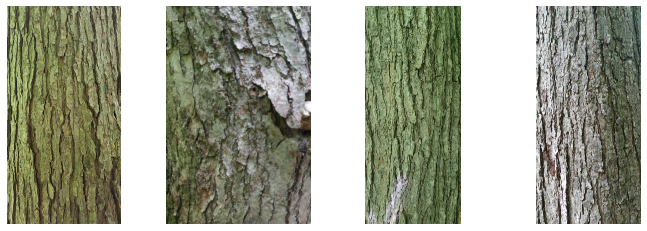

ERS  Érable à sucre 
/tmp/lab_id_arbres/training/ERS/224_ERS_94_Nexus 5_20170804_093453_12.jpg
/tmp/lab_id_arbres/training/ERS/579_ERS_107_GalaxyS7_20170920_163900_6.jpg
/tmp/lab_id_arbres/training/ERS/595_ERS_97_GalaxyS7_20170607_135406_56.jpg
/tmp/lab_id_arbres/training/ERS/596_ERS_214_GalaxyS7_20170607_135637_64.jpg


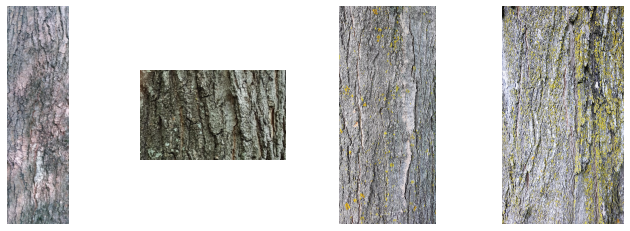

BOJ  Bouleau jaune 
/tmp/lab_id_arbres/training/BOJ/26_BOJ_100_Nexus 5_20170804_091719_22.jpg
/tmp/lab_id_arbres/training/BOJ/648_BOJ_79_GalaxyS5_20170615_120708_31.jpg
/tmp/lab_id_arbres/training/BOJ/643_BOJ_79_GalaxyS5_20170615_111711_17.jpg
/tmp/lab_id_arbres/training/BOJ/460_BOJ_89_GalaxyS5_20170607_144947_36.jpg


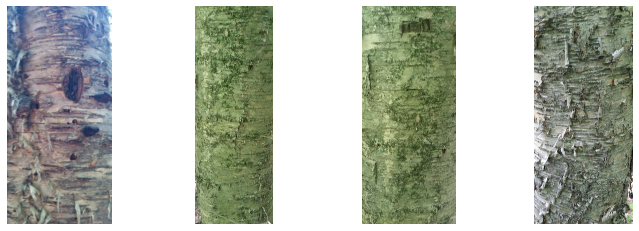

BOP  Bouleau à papier 
/tmp/lab_id_arbres/training/BOP/664_BOP_61_GalaxyS5_20170615_114448_11.jpg
/tmp/lab_id_arbres/training/BOP/470_BOP_63_GalaxyS5_20170607_153229_13.jpg
/tmp/lab_id_arbres/training/BOP/665_BOP_81_GalaxyS5_20170712_102518_20.jpg
/tmp/lab_id_arbres/training/BOP/474_BOP_75_GalaxyS7_20170607_154259_20.jpg


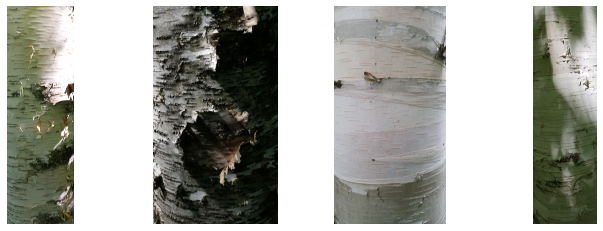

FRA  Frêne d'Amérique 
/tmp/lab_id_arbres/training/FRA/271_FRA_87_Nexus 5_20170906_105532_11.jpg
/tmp/lab_id_arbres/training/FRA/605_FRA_104_GalaxyS7_20170607_151316_6.jpg
/tmp/lab_id_arbres/training/FRA/608_FRA_49_GalaxyS5_20170607_152502_19.jpg
/tmp/lab_id_arbres/training/FRA/260_FRA_112_Nexus 5_20170804_102501_6.jpg


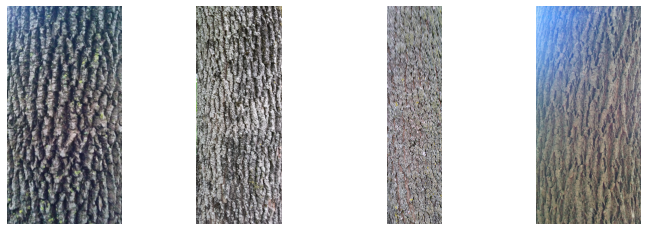

EPO  Épinette de Norvège 
/tmp/lab_id_arbres/training/EPO/126_EPO_102_Nexus 5_20170921_151608_14.jpg
/tmp/lab_id_arbres/training/EPO/123_EPO_155_Nexus 5_20170921_151315_20.jpg
/tmp/lab_id_arbres/training/EPO/141_EPO_84_Nexus 5_20170921_154013_4.jpg
/tmp/lab_id_arbres/training/EPO/739_EPO_131_GalaxyS5_20170615_100819_12.jpg


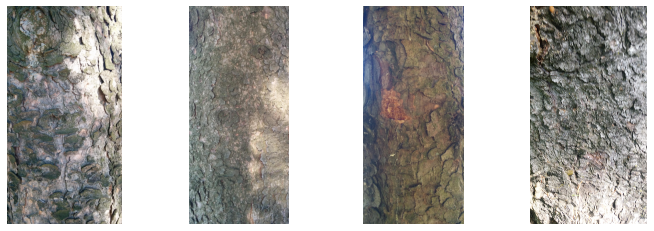

EPB  Épinette blanche 
/tmp/lab_id_arbres/training/EPB/89_EPB_71_Nexus 5_20170817_111001_10.jpg
/tmp/lab_id_arbres/training/EPB/690_EPB_93_GalaxyS5_20170712_123026_10.jpg
/tmp/lab_id_arbres/training/EPB/82_EPB_90_Nexus 5_20170817_105916_5.jpg
/tmp/lab_id_arbres/training/EPB/687_EPB_50_GalaxyS5_20170712_122637_7.jpg


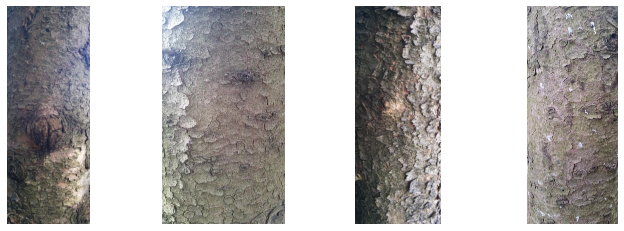

EPN  Épinette noire 
/tmp/lab_id_arbres/training/EPN/704_EPN_105_GalaxyS5_20170622_101835_19.jpg
/tmp/lab_id_arbres/training/EPN/705_EPN_73_GalaxyS5_20170622_102446_3.jpg
/tmp/lab_id_arbres/training/EPN/738_EPN_73_GalaxyS5_20170622_115614_6.jpg
/tmp/lab_id_arbres/training/EPN/703_EPN_70_GalaxyS5_20170622_101740_9.jpg


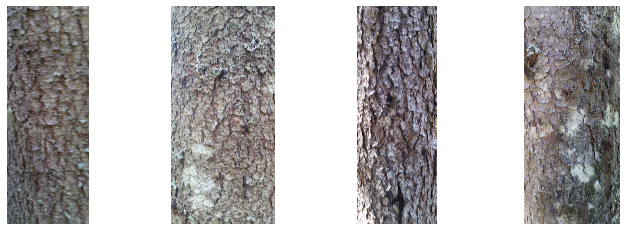

EPR  Épinette rouge 
/tmp/lab_id_arbres/training/EPR/535_EPR_60_GalaxyS5_20170607_143651_4.jpg
/tmp/lab_id_arbres/training/EPR/540_EPR_44_GalaxyS5_20170607_154820_15.jpg
/tmp/lab_id_arbres/training/EPR/751_EPR_98_GalaxyS5_20170607_154932_4.jpg
/tmp/lab_id_arbres/training/EPR/180_EPR_97_Nexus 5_20170608_102619_19.jpg


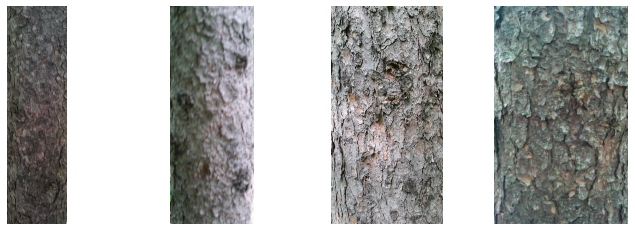

CHR  Chêne rouge 
/tmp/lab_id_arbres/training/CHR/530_CHR_75_GalaxyS5_20170607_140002_17.jpg
/tmp/lab_id_arbres/training/CHR/522_CHR_114_GalaxyS7_20170916_182423_12.jpg
/tmp/lab_id_arbres/training/CHR/681_CHR_90_GalaxyS5_20170713_110456_6.jpg
/tmp/lab_id_arbres/training/CHR/532_CHR_95_GalaxyS7_20170607_145740_2.jpg


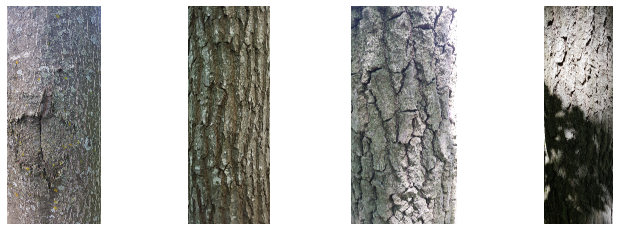

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 4

TRAINING_DIR = "/tmp/lab_id_arbres/training/"

for arbre_id in data_ecorces.keys():
    try:
        dir_path = os.path.join(TRAINING_DIR,arbre_id+os.sep)
        liste_fichiers = os.listdir(os.path.join(TRAINING_DIR,arbre_id+os.sep))
        next_two_pics = [os.path.join(dir_path, fname) for fname in liste_fichiers[0:pic_index]]
        fig = plt.figure(figsize=(12,4))
        print(arbre_id,noms_arbres[data_ecorces[arbre_id]].split('-')[1])
        for i, img_path in enumerate(next_two_pics):
            print(img_path)
            img = mpimg.imread(img_path)
            plt.subplot(1,pic_index,i+1)
            plt.imshow(img)
            plt.axis('Off')
        plt.show()
    except:
        continue

# Création d'un modèle d'apprentissage par transfert

## Importation d'un modèle inception pré-entraîné

In [40]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


--2020-08-17 17:11:28--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.24.128, 2404:6800:4003:c00::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   132MB/s    in 0.6s    

2020-08-17 17:11:29 (132 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [41]:
import os

import keras
print("Keras version:",keras.__version__)
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()


Keras version: 2.4.3
TensorFlow version: 2.3.0
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
________________________________________

In [42]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 7, 7, 768)


In [43]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
number_of_target_class = 10
x = layers.Dense(number_of_target_class, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  #  rotation_range = 40,
                                  #  width_shift_range = 0.2,
                                  #  height_shift_range = 0.2,
                                  #  shear_range = 0.2,
                                  #  zoom_range = 0.2,
                                  #  horizontal_flip = True)
)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  # rotation_range = 40,
                                  # width_shift_range = 0.2,
                                  # height_shift_range = 0.2,
                                  # shear_range = 0.2,
                                  # zoom_range = 0.2,
                                  # horizontal_flip = True)
)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(TESTING_DIR,
                                                          batch_size  = 20,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150))
print("Data amplification done!")

Found 11091 images belonging to 10 classes.
Found 2777 images belonging to 10 classes.
Data amplification done!


In [58]:
validation_steps=20
loss0,accuracy0 = model.evaluate(validation_generator, steps = validation_steps)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

20/20 [==============================] - 43s 2s/step - loss: 2.6231 - accuracy: 0.0450
initial loss: 2.62
initial accuracy: 0.05


In [59]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 10,
            epochs = 20,
            validation_steps = 3,
            verbose = 2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
10/10 - 34s - loss: 4.3092 - accuracy: 0.2400 - val_loss: 1.7171 - val_accuracy: 0.3333
Epoch 2/20
10/10 - 32s - loss: 1.8946 - accuracy: 0.3450 - val_loss: 2.5352 - val_accuracy: 0.2500
Epoch 3/20
10/10 - 30s - loss: 1.9089 - accuracy: 0.3650 - val_loss: 1.6619 - val_accuracy: 0.3667
Epoch 4/20
10/10 - 31s - loss: 1.5325 - accuracy: 0.4500 - val_loss: 1.8103 - val_accuracy: 0.4333
Epoch 5/20
10/10 - 31s - loss: 1.5442 - accuracy: 0.4450 - val_loss: 1.4355 - val_accuracy: 0.5667
Epoch 6/20
10/10 - 30s - loss: 1.6399 - accuracy: 0.4000 - val_loss: 1.3739 - val_accuracy: 0.5000
Epoch 7/20
10/10 - 30s - loss: 1.3188 - accuracy: 0.5550 - val_loss: 1.1595 - val_accuracy: 0.4833
Epoch 8/20
10/10 - 32s - loss: 1.5107 - accuracy: 0.4250 - val_loss: 1.3337 - val_accuracy: 0.5667
Epoch 9/20
10/10 - 31s - loss: 1.5138 - accuracy: 0.4800 - val_loss: 1.5935 - val_accuracy: 0.4000
Epoch 10/20
10/10 - 29s - loss: 1

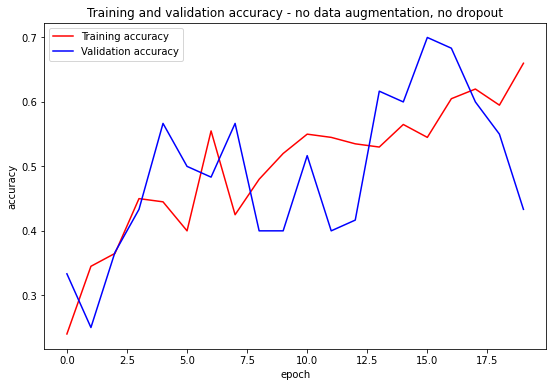

In [60]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - no data augmentation, no dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

## Performing data augmentation on training dataset only and no dropout

In [61]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
number_of_target_class = 10
x = layers.Dense(number_of_target_class, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( TESTING_DIR,
                                                          batch_size  = 20,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150))


Found 11091 images belonging to 10 classes.
Found 2777 images belonging to 10 classes.


In [63]:
validation_steps=20
loss0,accuracy0 = model.evaluate(validation_generator, steps = validation_steps)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


20/20 [==============================] - 42s 2s/step - loss: 2.4966 - accuracy: 0.0550
initial loss: 2.50
initial accuracy: 0.05


In [64]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 10,
            verbose = 2)


Epoch 1/20
100/100 - 255s - loss: 1.8484 - accuracy: 0.3645 - val_loss: 1.3241 - val_accuracy: 0.4700
Epoch 2/20
100/100 - 250s - loss: 1.3325 - accuracy: 0.4995 - val_loss: 1.6150 - val_accuracy: 0.4400
Epoch 3/20
100/100 - 253s - loss: 1.2062 - accuracy: 0.5345 - val_loss: 1.0461 - val_accuracy: 0.5450
Epoch 4/20
100/100 - 249s - loss: 1.1026 - accuracy: 0.5726 - val_loss: 0.9405 - val_accuracy: 0.6150
Epoch 5/20
100/100 - 248s - loss: 1.0104 - accuracy: 0.6155 - val_loss: 1.2765 - val_accuracy: 0.5550
Epoch 6/20
100/100 - 251s - loss: 0.9869 - accuracy: 0.6250 - val_loss: 0.9268 - val_accuracy: 0.6500
Epoch 7/20
100/100 - 245s - loss: 0.9565 - accuracy: 0.6484 - val_loss: 1.0529 - val_accuracy: 0.5750
Epoch 8/20
100/100 - 252s - loss: 0.9141 - accuracy: 0.6685 - val_loss: 0.9340 - val_accuracy: 0.6150
Epoch 9/20
100/100 - 250s - loss: 0.9269 - accuracy: 0.6529 - val_loss: 0.9650 - val_accuracy: 0.6400
Epoch 10/20
100/100 - 252s - loss: 0.8959 - accuracy: 0.6660 - val_loss: 0.9423 - 

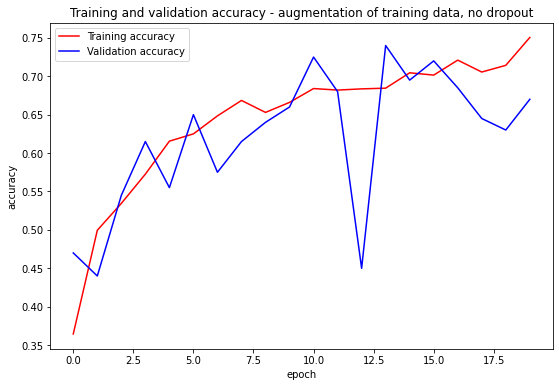

In [65]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - augmentation of training data, no dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


## Performing data augmentation on training and evaluation dataset, no dropout

In [66]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
number_of_target_class = 10
x = layers.Dense(number_of_target_class, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [67]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(TESTING_DIR,
                                                         batch_size  = 20,
                                                         class_mode  = 'categorical', 
                                                         target_size = (150, 150))


Found 11091 images belonging to 10 classes.
Found 2777 images belonging to 10 classes.


In [68]:
validation_steps=20
loss0,accuracy0 = model.evaluate(validation_generator, steps = validation_steps)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


20/20 [==============================] - 46s 2s/step - loss: 2.4539 - accuracy: 0.0925
initial loss: 2.45
initial accuracy: 0.09


In [69]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)


Epoch 1/20
100/100 - 361s - loss: 1.7735 - accuracy: 0.3970 - val_loss: 1.4304 - val_accuracy: 0.4560
Epoch 2/20
100/100 - 358s - loss: 1.2837 - accuracy: 0.5215 - val_loss: 1.1392 - val_accuracy: 0.5620
Epoch 3/20
100/100 - 361s - loss: 1.1987 - accuracy: 0.5610 - val_loss: 1.0816 - val_accuracy: 0.5790
Epoch 4/20
100/100 - 362s - loss: 1.0545 - accuracy: 0.6047 - val_loss: 1.0177 - val_accuracy: 0.5970
Epoch 5/20
100/100 - 370s - loss: 0.9889 - accuracy: 0.6340 - val_loss: 1.0187 - val_accuracy: 0.6300
Epoch 6/20
100/100 - 360s - loss: 1.0203 - accuracy: 0.6335 - val_loss: 0.9972 - val_accuracy: 0.6420
Epoch 7/20
100/100 - 355s - loss: 0.9555 - accuracy: 0.6565 - val_loss: 0.9028 - val_accuracy: 0.6440
Epoch 8/20
100/100 - 358s - loss: 0.9344 - accuracy: 0.6520 - val_loss: 0.9558 - val_accuracy: 0.6440
Epoch 9/20
100/100 - 360s - loss: 0.9269 - accuracy: 0.6595 - val_loss: 0.9035 - val_accuracy: 0.6660
Epoch 10/20
100/100 - 359s - loss: 0.8882 - accuracy: 0.6715 - val_loss: 0.9076 - 

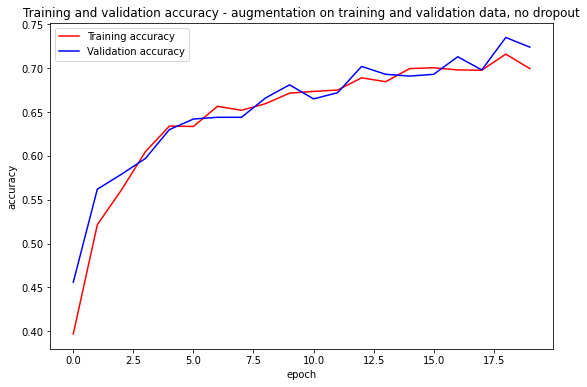

In [70]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - augmentation on training and validation data, no dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


## Performing data augmentation on training dataset, with dropout

In [71]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
number_of_target_class = 10
x = layers.Dense(number_of_target_class, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [72]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(TESTING_DIR,
                                                         batch_size  = 20,
                                                         class_mode  = 'categorical', 
                                                         target_size = (150, 150))


Found 11091 images belonging to 10 classes.
Found 2777 images belonging to 10 classes.


In [73]:
validation_steps=20
loss0,accuracy0 = model.evaluate(validation_generator, steps = validation_steps)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


20/20 [==============================] - 41s 2s/step - loss: 2.4129 - accuracy: 0.1425
initial loss: 2.41
initial accuracy: 0.14


In [74]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)


Epoch 1/20
100/100 - 354s - loss: 1.8629 - accuracy: 0.3670 - val_loss: 1.4696 - val_accuracy: 0.4280
Epoch 2/20
100/100 - 349s - loss: 1.3584 - accuracy: 0.5030 - val_loss: 1.2206 - val_accuracy: 0.4990
Epoch 3/20
100/100 - 344s - loss: 1.2776 - accuracy: 0.5290 - val_loss: 1.0534 - val_accuracy: 0.6020
Epoch 4/20
100/100 - 349s - loss: 1.1483 - accuracy: 0.5705 - val_loss: 1.5170 - val_accuracy: 0.4930
Epoch 5/20
100/100 - 357s - loss: 1.0942 - accuracy: 0.5960 - val_loss: 1.0464 - val_accuracy: 0.6100
Epoch 6/20
100/100 - 353s - loss: 1.0617 - accuracy: 0.6105 - val_loss: 1.0199 - val_accuracy: 0.6360
Epoch 7/20
100/100 - 356s - loss: 1.0128 - accuracy: 0.6258 - val_loss: 1.5694 - val_accuracy: 0.5380
Epoch 8/20
100/100 - 355s - loss: 1.0173 - accuracy: 0.6185 - val_loss: 0.7662 - val_accuracy: 0.7120
Epoch 9/20
100/100 - 350s - loss: 0.9622 - accuracy: 0.6375 - val_loss: 1.0406 - val_accuracy: 0.6430
Epoch 10/20
100/100 - 349s - loss: 0.9950 - accuracy: 0.6265 - val_loss: 0.8734 - 

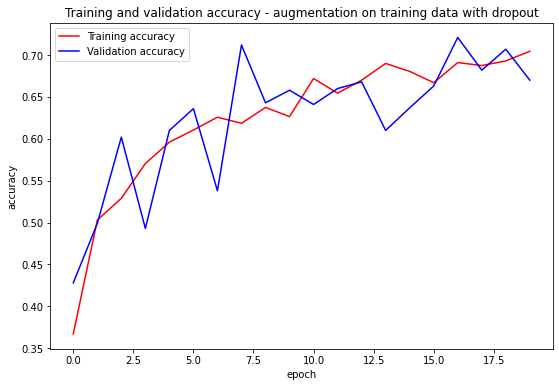

In [75]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - augmentation on training data with dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


In [76]:
print("IPython Notebook executed")


IPython Notebook executed


## Transfer learning & fine-tuning

In [44]:
import os

import keras
print("Keras version:",keras.__version__)
import tensorflow as tf
print("TensorFlow version:",tf.__version__)


from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# for layer in pre_trained_model.layers:
#     layer.trainable = False

pre_trained_model.trainable = True

# Let's take a look to see how many layers are in the pretrained model
nbr_layers_pretrained_model = len(pre_trained_model.layers)
print("Number of layers in the pretrained model: ", nbr_layers_pretrained_model)

# Fine-tune from this layer onwards
fine_tune_at = 150
print("Number of non trainable layers in the pretrained model: ", fine_tune_at )

# Freeze all the layers before the `fine_tune_at` layer
for layer in pre_trained_model.layers[:fine_tune_at]:
    layer.trainable =  False

# How to get the layer index from the layer name
# https://www.thetopsites.net/article/50151157.shtml
layer_names = [layer.name for layer in pre_trained_model.layers]
last_layer_index = layer_names.index('mixed7')
print("Last layer index:",last_layer_index)
print("Number of trainable layers in the pretrained model: ", 
      nbr_layers_pretrained_model-fine_tune_at-(nbr_layers_pretrained_model-last_layer_index))

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


Keras version: 2.4.3
TensorFlow version: 2.3.0
Number of layers in the pretrained model:  311
Number of non trainable layers in the pretrained model:  150
Last layer index: 228
Number of trainable layers in the pretrained model:  78
last layer output shape:  (None, 7, 7, 768)


In [45]:
pre_trained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [46]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
number_of_target_class = 10
x = layers.Dense(number_of_target_class, activation='softmax')(x)           

transfer_model = Model( pre_trained_model.input, x) 

print("Number of layers in the learning transfer model: ", len(transfer_model.layers))


Number of layers in the learning transfer model:  233


In [47]:
transfer_model.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [48]:
len(transfer_model.trainable_variables)


52

In [49]:
transfer_model.compile(optimizer = RMSprop(lr=0.0001/10), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/lab_id_arbres/training/"
TESTING_DIR = "/tmp/lab_id_arbres/testing/"

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( TESTING_DIR,
                                                          batch_size  = 20,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150))

print("Data amplification done!")

Found 11091 images belonging to 10 classes.
Found 2777 images belonging to 10 classes.
Data amplification done!


In [51]:
initial_epochs = 20
fine_tune_epochs = 30
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = transfer_model.fit(train_generator,
                                  validation_data = validation_generator,
                                  steps_per_epoch = 100,
                                  epochs = total_epochs,
                                  validation_steps = 10,
                                  verbose = 2)


Epoch 1/50
100/100 - 262s - loss: 2.0690 - accuracy: 0.2410 - val_loss: 1.8185 - val_accuracy: 0.3000
Epoch 2/50
100/100 - 264s - loss: 1.7316 - accuracy: 0.3925 - val_loss: 1.5465 - val_accuracy: 0.4100
Epoch 3/50
100/100 - 257s - loss: 1.4697 - accuracy: 0.4860 - val_loss: 1.3496 - val_accuracy: 0.5450
Epoch 4/50
100/100 - 260s - loss: 1.3162 - accuracy: 0.5345 - val_loss: 1.1779 - val_accuracy: 0.5900
Epoch 5/50
100/100 - 257s - loss: 1.1697 - accuracy: 0.5840 - val_loss: 1.1271 - val_accuracy: 0.5600
Epoch 6/50
100/100 - 264s - loss: 1.1297 - accuracy: 0.5806 - val_loss: 0.9789 - val_accuracy: 0.6450
Epoch 7/50
100/100 - 265s - loss: 1.0390 - accuracy: 0.6155 - val_loss: 0.9905 - val_accuracy: 0.6450
Epoch 8/50
100/100 - 259s - loss: 1.0084 - accuracy: 0.6260 - val_loss: 0.9056 - val_accuracy: 0.6800
Epoch 9/50
100/100 - 266s - loss: 0.9854 - accuracy: 0.6389 - val_loss: 0.8198 - val_accuracy: 0.7500
Epoch 10/50
100/100 - 265s - loss: 0.9275 - accuracy: 0.6745 - val_loss: 0.7149 - 

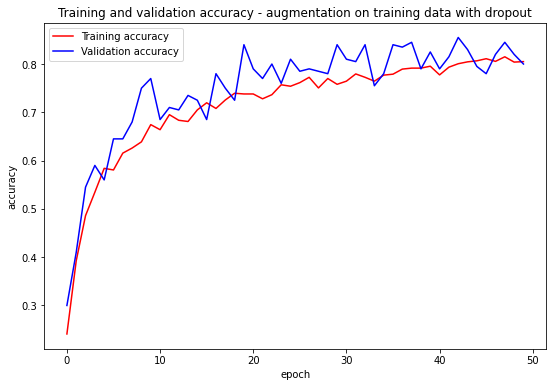

In [52]:
import matplotlib.pyplot as plt
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - augmentation on training data with dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


In [53]:
print("IPython Notebook executed")

IPython Notebook executed
